# Analyze News Data with Natural Language Processing

## Get news data through API
https://newsapi.org/

In [1]:
import requests

response = requests.get(url)
print(response.json())

{'status': 'ok', 'totalResults': 793, 'articles': [{'source': {'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}, 'author': 'Benoit Faucon, Summer Said', 'title': 'Saudis Renew Push for Output Cuts as Coronavirus Weakens Oil Business - The Wall Street Journal', 'description': 'Outbreak is fueling Saudi Arabia’s push for supply cuts, hurting the oil industry’s profits and leading to project delays', 'url': 'https://www.wsj.com/articles/saudis-renew-push-for-output-cuts-as-coronavirus-weakens-oil-business-11583163297', 'urlToImage': 'https://images.wsj.net/im-159449/social', 'publishedAt': '2020-03-02T18:54:00Z', 'content': 'Saudi Arabia is trying to persuade Russia to join oil producers in an emergency crude-production cut, as the industry grapples with oversupply and operational slowdowns resulting from the spread of the coronavirus.\r\nRepresentatives from the Organization of th… [+270 chars]'}, {'source': {'id': 'the-wall-street-journal', 'name': 'The Wall Street Jo

In [2]:
import json
print(json.dumps(response.json(), indent=2))

{
  "status": "ok",
  "totalResults": 793,
  "articles": [
    {
      "source": {
        "id": "the-wall-street-journal",
        "name": "The Wall Street Journal"
      },
      "author": "Benoit Faucon, Summer Said",
      "title": "Saudis Renew Push for Output Cuts as Coronavirus Weakens Oil Business - The Wall Street Journal",
      "description": "Outbreak is fueling Saudi Arabia\u2019s push for supply cuts, hurting the oil industry\u2019s profits and leading to project delays",
      "url": "https://www.wsj.com/articles/saudis-renew-push-for-output-cuts-as-coronavirus-weakens-oil-business-11583163297",
      "urlToImage": "https://images.wsj.net/im-159449/social",
      "publishedAt": "2020-03-02T18:54:00Z",
      "content": "Saudi Arabia is trying to persuade Russia to join oil producers in an emergency crude-production cut, as the industry grapples with oversupply and operational slowdowns resulting from the spread of the coronavirus.\r\nRepresentatives from the Organization 

## Obtain headlines from JSON file

In [4]:
import pandas as pd
import numpy as np

In [5]:
response.json()['articles'][0]['title']
num_news = len(response.json()['articles'])

headlines = list()

for i in range(num_news):
    headlines.append(response.json()['articles'][i]['title'])

headlines = pd.DataFrame(headlines, columns=['headline'])
print(headlines)

                                             headline
0   Saudis Renew Push for Output Cuts as Coronavir...
1   Tech Stocks Stage Dramatic Reversal Higher - T...
2   Tim Cook and Apple Bet Everything on China. Th...
3                               Airlines Face Test...
4   Coronavirus Spreading Faster Outside China Tha...
5   U.S. Orders Cap on Chinese State Media Personn...
6                      Wildest NFL Off-Season Ever...
7   Collision of Two White Dwarf Stars Offers Clue...
8           Legendary GE CEO Jack Welch is dead at 84
9   Jack Welch, Legendary CEO of General Electric,...
10     Coronavirus Saps Energy Markets—Energy Journal
11  Michael Bloomberg's Global Business Won't Be E...
12  Leader of Secretive Church at Center of South ...
13  How a South Korean Church Helped Spread the Co...
14  Long-Term U.S. Treasury Yields Hit Record Lows...
15                The Rise and Fall of the Boy Scouts
16  Newsletter: Coronavirus Taking a Toll on Globa...
17  WSJ Wealth Adviser Brief

In [6]:
#from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")
#from gensim.models import Doc2Vec
#from sklearn import utils
#from sklearn.model_selection import train_test_split
#import gensim
#from sklearn.linear_model import LogisticRegression
#from gensim.models.doc2vec import TaggedDocument
#import re

## NLP functions

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
import string

# Define NLP functions

# Tokenizer
def tokenize(s):
    s = "".join(" " if x in string.punctuation else x for x in s.lower())
    return s.split()

# Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(sentence):
    return [lemmatizer.lemmatize(word) for word in sentence]

# Stemming
ps = PorterStemmer()
#ls = LancasterStemmer()
#ss = SnowballStemmer("english")

def stemming(sentence):
    return [ps.stem(word) for word in sentence]
    #return [ls.stem(word) for word in sentence]
    #return [ss.stem(word) for word in sentence]
    #return [stem(word) for word in sentence]

# Remove Stop words
    
stop_words = stopwords.words('english')

for s in string.punctuation:
    stop_words.append(s)

for s in '1234567890':
    stop_words.append(s)

def remove_stopwords(sentence):
    return [word for word in sentence if word not in stop_words]

def remove_low_freq_words(sentence):
    return [word for word in sentence if word not in low_freq_words]

/anaconda3/envs/Python37/lib/python3.7/site-packages/sklearn/feature_extraction/dict_vectorizer.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


## Process regular expressions, stemming, lemmatization, etc

In [9]:
headlines["headline"] = headlines["headline"].apply(str.lower)
headlines["headline"]

0     saudis renew push for output cuts as coronavir...
1     tech stocks stage dramatic reversal higher - t...
2     tim cook and apple bet everything on china. th...
3                                 airlines face test...
4     coronavirus spreading faster outside china tha...
5     u.s. orders cap on chinese state media personn...
6                        wildest nfl off-season ever...
7     collision of two white dwarf stars offers clue...
8             legendary ge ceo jack welch is dead at 84
9     jack welch, legendary ceo of general electric,...
10       coronavirus saps energy markets—energy journal
11    michael bloomberg's global business won't be e...
12    leader of secretive church at center of south ...
13    how a south korean church helped spread the co...
14    long-term u.s. treasury yields hit record lows...
15                  the rise and fall of the boy scouts
16    newsletter: coronavirus taking a toll on globa...
17    wsj wealth adviser briefing: exaggerated s

In [10]:
headlines["headline"] = headlines["headline"].apply(tokenize)
headlines["headline"]

0     [saudis, renew, push, for, output, cuts, as, c...
1     [tech, stocks, stage, dramatic, reversal, high...
2     [tim, cook, and, apple, bet, everything, on, c...
3                                [airlines, face, test]
4     [coronavirus, spreading, faster, outside, chin...
5     [u, s, orders, cap, on, chinese, state, media,...
6                     [wildest, nfl, off, season, ever]
7     [collision, of, two, white, dwarf, stars, offe...
8     [legendary, ge, ceo, jack, welch, is, dead, at...
9     [jack, welch, legendary, ceo, of, general, ele...
10    [coronavirus, saps, energy, markets—energy, jo...
11    [michael, bloomberg, s, global, business, won,...
12    [leader, of, secretive, church, at, center, of...
13    [how, a, south, korean, church, helped, spread...
14    [long, term, u, s, treasury, yields, hit, reco...
15         [the, rise, and, fall, of, the, boy, scouts]
16    [newsletter, coronavirus, taking, a, toll, on,...
17    [wsj, wealth, adviser, briefing, exaggerat

In [11]:
headlines["headline"] = headlines["headline"].apply(lemmatize)
headlines["headline"]

0     [saudi, renew, push, for, output, cut, a, coro...
1     [tech, stock, stage, dramatic, reversal, highe...
2     [tim, cook, and, apple, bet, everything, on, c...
3                                 [airline, face, test]
4     [coronavirus, spreading, faster, outside, chin...
5     [u, s, order, cap, on, chinese, state, medium,...
6                     [wildest, nfl, off, season, ever]
7     [collision, of, two, white, dwarf, star, offer...
8     [legendary, ge, ceo, jack, welch, is, dead, at...
9     [jack, welch, legendary, ceo, of, general, ele...
10    [coronavirus, sap, energy, markets—energy, jou...
11    [michael, bloomberg, s, global, business, won,...
12    [leader, of, secretive, church, at, center, of...
13    [how, a, south, korean, church, helped, spread...
14    [long, term, u, s, treasury, yield, hit, recor...
15          [the, rise, and, fall, of, the, boy, scout]
16    [newsletter, coronavirus, taking, a, toll, on,...
17    [wsj, wealth, adviser, briefing, exaggerat

In [12]:
headlines["headline"] = headlines["headline"].apply(remove_stopwords)
headlines["headline"]

0     [saudi, renew, push, output, cut, coronavirus,...
1     [tech, stock, stage, dramatic, reversal, highe...
2     [tim, cook, apple, bet, everything, china, cor...
3                                 [airline, face, test]
4     [coronavirus, spreading, faster, outside, chin...
5     [u, order, cap, chinese, state, medium, person...
6                          [wildest, nfl, season, ever]
7     [collision, two, white, dwarf, star, offer, cl...
8           [legendary, ge, ceo, jack, welch, dead, 84]
9     [jack, welch, legendary, ceo, general, electri...
10    [coronavirus, sap, energy, markets—energy, jou...
11    [michael, bloomberg, global, business, easy, c...
12    [leader, secretive, church, center, south, kor...
13    [south, korean, church, helped, spread, corona...
14    [long, term, u, treasury, yield, hit, record, ...
15                             [rise, fall, boy, scout]
16    [newsletter, coronavirus, taking, toll, global...
17    [wsj, wealth, adviser, briefing, exaggerat

## Obtain embeddings - Doc2Vec

In [24]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(df_new['title_l']))]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(headlines["headline"])]

In [25]:
documents

[TaggedDocument(words=['saudi', 'renew', 'push', 'output', 'cut', 'coronavirus', 'weakens', 'oil', 'business', 'wall', 'street', 'journal'], tags=[0]),
 TaggedDocument(words=['tech', 'stock', 'stage', 'dramatic', 'reversal', 'higher', 'wall', 'street', 'journal'], tags=[1]),
 TaggedDocument(words=['tim', 'cook', 'apple', 'bet', 'everything', 'china', 'coronavirus', 'hit'], tags=[2]),
 TaggedDocument(words=['airline', 'face', 'test'], tags=[3]),
 TaggedDocument(words=['coronavirus', 'spreading', 'faster', 'outside', 'china', 'within', 'wall', 'street', 'journal'], tags=[4]),
 TaggedDocument(words=['u', 'order', 'cap', 'chinese', 'state', 'medium', 'personnel', 'wall', 'street', 'journal'], tags=[5]),
 TaggedDocument(words=['wildest', 'nfl', 'season', 'ever'], tags=[6]),
 TaggedDocument(words=['collision', 'two', 'white', 'dwarf', 'star', 'offer', 'clue', 'rare', 'cosmic', 'event', 'wall', 'street', 'journal'], tags=[7]),
 TaggedDocument(words=['legendary', 'ge', 'ceo', 'jack', 'welch', 

In [29]:
model = Doc2Vec(documents, vector_size=25, window=2, min_count=1, workers=4)

In [32]:
#appending all the vectors in a list for training
X=[]
for i in range(20):
    X.append(model.docvecs[i])
    print(model.docvecs[i])

[ 0.01156097  0.00842657  0.0047307  -0.00057503 -0.01490565  0.00165214
  0.01056284  0.01371252  0.01420717 -0.00112821 -0.00637715  0.00495564
 -0.00594578  0.00773305  0.01520802  0.01564086 -0.00679526  0.01021548
 -0.00174805  0.01598638  0.00840884 -0.0078946  -0.00867121 -0.0031955
  0.01969692]
[-0.01048496 -0.01879705 -0.00955989  0.00559177 -0.01230002 -0.00439624
 -0.00126387  0.01739201  0.01958081  0.0002418  -0.003906    0.01438724
  0.0131123  -0.01136092 -0.00846958 -0.00197432 -0.01993669 -0.00137866
 -0.00301094  0.01667083 -0.00310794 -0.00024169 -0.00213518 -0.01464404
 -0.00277324]
[ 0.01010718  0.00210458 -0.01378485 -0.01308318  0.01788651  0.01568544
  0.00682296  0.00356132  0.01250898 -0.01666843 -0.01850578  0.00792386
  0.00827461  0.01742305 -0.01442195  0.01683041  0.00973344  0.01173847
 -0.00211106 -0.00599477 -0.00060133  0.01443172 -0.01152513  0.01751753
  0.01868213]
[-0.01245263 -0.00264162 -0.01946105  0.01890337  0.01013695  0.01773914
  0.004782

In [56]:
#import the modules
from sklearn.cluster import KMeans
#create the kmeans object withe vectors created previously
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clusters = kmeans.labels_.tolist()

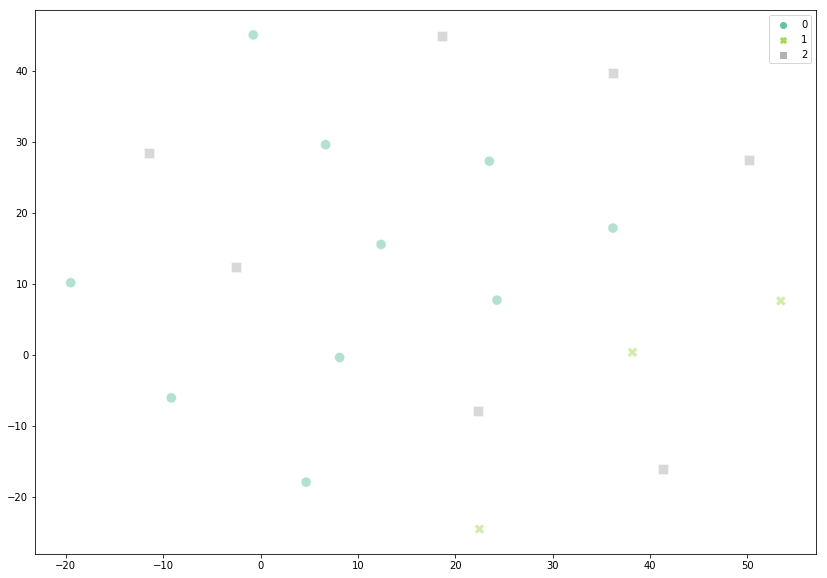

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

tsne_df = tsne.fit_transform(X)
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], s=100, alpha=0.5, hue=clusters, style=clusters, palette="Set2")

plt.show()

array([[  4.6844797 , -17.963833  ],
       [ 41.31737   , -16.042406  ],
       [-19.489807  ,  10.140945  ],
       [ 18.596504  ,  44.888813  ],
       [ 38.197945  ,   0.32803732],
       [ 22.488274  , -24.57478   ],
       [ 23.500103  ,  27.259632  ],
       [ 22.354208  ,  -7.9126225 ],
       [ 50.178196  ,  27.439676  ],
       [-11.496268  ,  28.387661  ],
       [ 36.239716  ,  39.718773  ],
       [  8.127045  ,  -0.39495468],
       [ 53.43973   ,   7.567437  ],
       [ -9.157109  ,  -6.0878806 ],
       [ -0.7456424 ,  45.04733   ],
       [ 36.19529   ,  17.83906   ],
       [ 12.388022  ,  15.526145  ],
       [  6.685388  ,  29.589533  ],
       [ 24.277863  ,   7.6874137 ],
       [ -2.5316324 ,  12.398088  ]], dtype=float32)